<a href="https://colab.research.google.com/github/Zunaid686/NYC-taxi-trip-duration/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from datetime import datetime
import datetime
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir='/content/drive/MyDrive/almabetter/Machine learnig data/NYC Taxi Data.csv'
# file_name= 'NYC Taxi Data.csv'
df=pd.read_csv(working_dir)

### Doing some basics inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**so we have no null values that is great.**

In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [ ]:
df.keys()

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### change the data type of pickup_datetime and dropoff_datetime.

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

## Adds some features in our dataset

ADDING NEW COLUMNS 

PICK UP DAY, DROP DAY ,

PICK UP WEAKDAY, DROPOFF WEEKDAY PICK UP

 MONTH AND DROP OFF MONTH

In [ ]:
# creating pick up and drop off month column
df['pickup_month'] = pd.DatetimeIndex(df['pickup_datetime']).month
df['dropoff_month'] = pd.DatetimeIndex(df['dropoff_datetime']).month

#creating pick up and drop off weekdays 
df['pickup_by_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_by_weekday'] = df['dropoff_datetime'].dt.weekday

# creating pickup and drop off hours
df['pickup_by_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_by_hour'] = df['dropoff_datetime'].dt.hour

# creating pick up and drop off datetime.
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

**Now we divide the whole in 4 zones to determine when the ride is occur **

###6am to 11:59am return MORNING 

### 12pm to 3:59pm return  AFTERNOON 

### 4Ppm to 9:59pm return EVENING

### 10pm to 5:59am return  LATE NIGHT

 

In [ ]:
def time_of_day(x):
  if (x >= 5) &  (x < 12):
    return 'morning'
  elif (x >=12) &  (x < 16):
    return 'afternoon'
  elif (x >=16) & (x < 22):
    return 'evening'
  else:
    return 'late night'

In [ ]:
time_of_day(22)

'late night'

### Now lets apply the function and make new column to dataset name time of day

In [ ]:
df['pickup_timeofday']=df['pickup_by_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_by_hour'].apply(time_of_day)

###  Now finally add new feature in our dataframe called 'trip distance'

In [ ]:
pip install haversine

In [ ]:
from haversine import haversine
# Create a function to determine the distance between two coordinate
def trip_distance(pickup_latitude,pickup_longitude, dropoff_latitude,dropoff_longitude):
    start_place = (pickup_latitude,pickup_longitude)
    finish_place = (dropoff_latitude,dropoff_longitude)
    
    return haversine( start_place,finish_place,unit='km')

In [ ]:
df['trip_distance'] = df.apply(lambda x: trip_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


In [ ]:
trip_distance(30.7367,76.7783,30.7028,76.8193)

5.437816404605563

In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,0,0,17,17,Monday,Monday,evening,evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,0,0,Sunday,Sunday,late night,late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,11,12,Tuesday,Tuesday,morning,afternoon,6.385107


In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
df_copy.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,0,0,17,17,Monday,Monday,evening,evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,0,0,Sunday,Sunday,late night,late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,11,12,Tuesday,Tuesday,morning,afternoon,6.385107


# FURTHUR ANALYSIS


### Let us analize the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


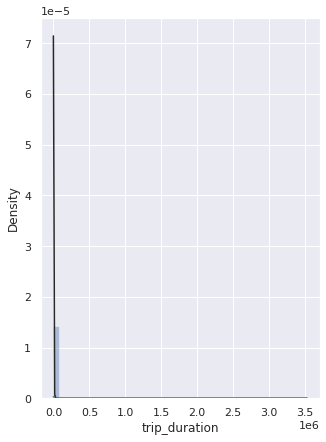

In [ ]:
plt.figure(figsize=(5,7))
sns.distplot(df_copy['trip_duration'], fit = norm)

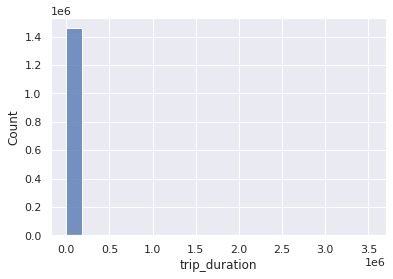

In [ ]:
sns.histplot(df_copy['trip_duration'],kde=False,bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


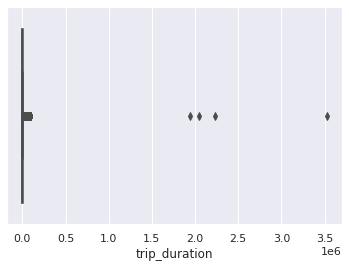

In [ ]:
sns.boxplot(df_copy['trip_duration'])

### As we can see their is some outliers in right side we have to remove these outliers

In [ ]:
df_copy['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
df_copy.drop(df_copy[df_copy['trip_duration'] > 2500 ].index, inplace = True)

df_copy.drop(df_copy[df_copy['trip_duration'] < 40 ].index, inplace = True)

In [ ]:
df_copy.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,trip_distance
count,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06,1.409135e+06
mean,1.534398e+00,1.663140e+00,-7.397587e+01,4.075194e+01,-7.397452e+01,4.075255e+01,7.682957e+02,3.505189e+00,3.505485e+00,3.056814e+00,3.060841e+00,1.359609e+01,1.357632e+01,3.104842e+00
std,4.988155e-01,1.314058e+00,6.879306e-02,3.127451e-02,6.918490e-02,3.432880e-02,4.958965e+02,1.680036e+00,1.680185e+00,1.957335e+00,1.959563e+00,6.441647e+00,6.519717e+00,3.592772e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,4.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399200e+01,4.073803e+01,-7.399137e+01,4.073671e+01,3.930000e+02,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,1.221177e+00
50%,2.000000e+00,1.000000e+00,-7.398196e+01,4.075437e+01,-7.397989e+01,4.075476e+01,6.470000e+02,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,1.400000e+01,1.400000e+01,2.042441e+00
75%,2.000000e+00,2.000000e+00,-7.396816e+01,4.076836e+01,-7.396356e+01,4.077003e+01,1.027000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.900000e+01,1.900000e+01,3.648437e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,2.500000e+03,6.000000e+00,7.000000e+00,6.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01,1.240910e+03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


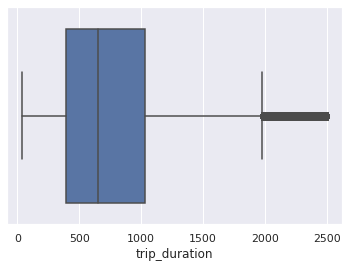

In [ ]:
sns.boxplot(df_copy['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


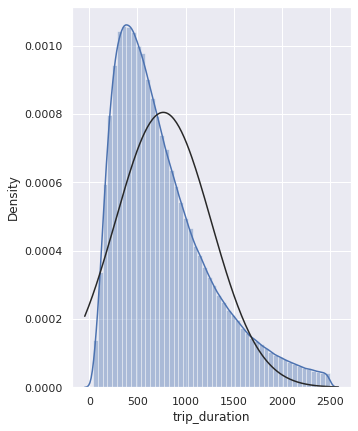

In [ ]:
plt.figure(figsize=(5,7))
sns.distplot(df_copy['trip_duration'], fit = norm)

In [ ]:
df_copy.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,0,0,17,17,Monday,Monday,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,6,0,0,Sunday,Sunday,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,1,11,12,Tuesday,Tuesday,morning,afternoon




---



### Vendor id

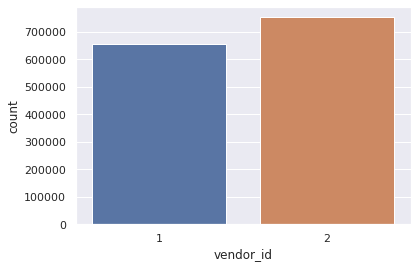

In [ ]:
sns.countplot(x='vendor_id',data=df_copy)

we can see their no difference in the both trips taken by the vendors.

### Passenger count

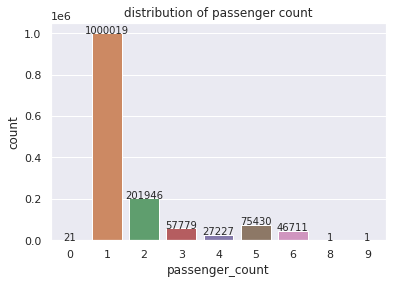

In [ ]:
ax=sns.countplot(x=df_copy['passenger_count'])
plt.title('distribution of passenger count')

# add labels to passenger count
for p in ax.patches:
  height=p.get_height()
  ax.text(x=p.get_x() + (p.get_width()/2),
  y=height + .2, ha='center', s='{:.0f}'.format(height))

plt.show()


if passenger count is zero their no possibilty of a taxi trip so we have to remove that having passenger count zero


In [ ]:
df_copy.drop(df_copy[df_copy['passenger_count'] ==0 ].index, inplace = True)

In [ ]:
df.shape

(1458644, 22)

In [ ]:
df_copy.passenger_count.value_counts()

1    1000019
2     201946
5      75430
3      57779
6      46711
4      27227
9          1
8          1
Name: passenger_count, dtype: int64

As we see  that their are 59 entries having 0 passenger which is not possibe practical because each having atleast 1 passenger in taxi.  so we have to drop that columns having 0 passenger.


and passenger count 7,8 and 9 having entries 3,1 and 1 which is very less as compare to other entries. so we have to drop that columns these entries.



In [ ]:
# df_copy.drop(df_copy[df_copy['passenger_count'] == 0].index, inplace = True)
df_copy.drop(df_copy[df_copy['passenger_count'] == 7].index, inplace = True)
df_copy.drop(df_copy[df_copy['passenger_count'] == 9].index, inplace = True)
df_copy.drop(df_copy[df_copy['passenger_count'] == 8].index, inplace = True)

In [ ]:
df_copy.passenger_count.value_counts()

1    1000019
2     201946
5      75430
3      57779
6      46711
4      27227
Name: passenger_count, dtype: int64

### Distance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


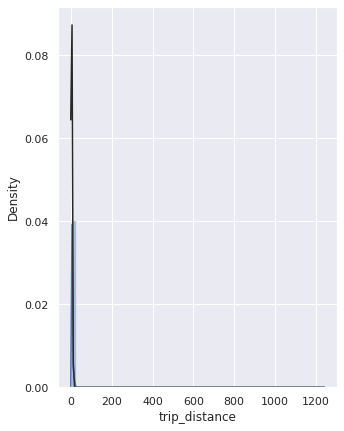

In [ ]:
# ax=sns.countplot(x=df_copy['trip_distance'])

plt.figure(figsize=(5,7))
sns.distplot(df_copy['trip_distance'], fit = norm)

In [ ]:
df_copy['trip_distance']>1000

NameError: ignored

In [ ]:
df_copy['trip_distance'].value_counts(ascending=True)

1.498523      1
4.669114      1
6.674419      1
12.261844     1
2.751562      1
             ..
0.000424      8
0.000848      8
0.001273      9
0.000424     12
0.000424     21
Name: trip_distance, Length: 1404687, dtype: int64

There are many entries having trip distance=0. Which is not possible trip distance have to be greater than 0. so we have to drop that rows having trip distance = 0.

In [ ]:
df_copy.drop(df_copy[df_copy['trip_distance'] == 0].index, inplace = True)

In [ ]:
df_copy['trip_distance'].value_counts()

0.000424    21
0.000424    12
0.001273     9
0.000424     8
0.000848     8
            ..
2.119030     1
5.045242     1
0.958703     1
4.026752     1
1.134044     1
Name: trip_distance, Length: 1404687, dtype: int64

### Trips per day

AttributeError: ignored

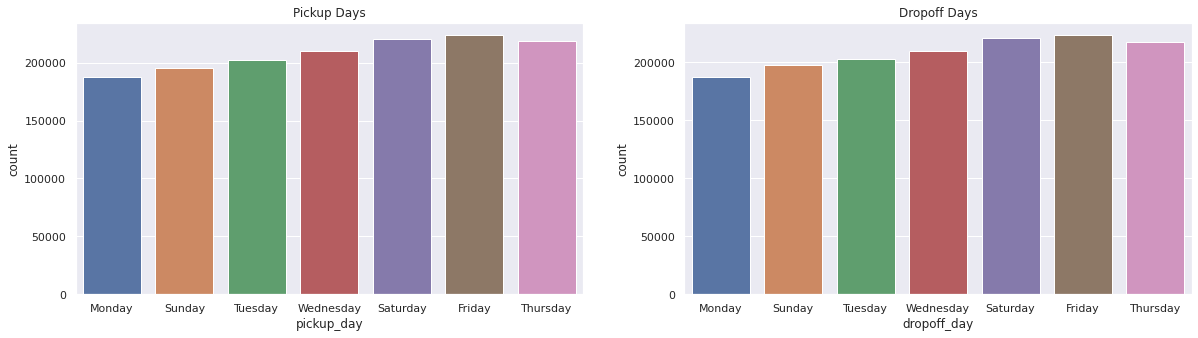

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)


df[['pickup_day', 'dropoff_day']].groupby(['pickup_day', 'dropoff_day']).sort_index().plot(kind='bar', legend=None)

as we can see most of the rides are taken on the FRIDAY and least rides are taken on MONDAY.

### Trips per Day

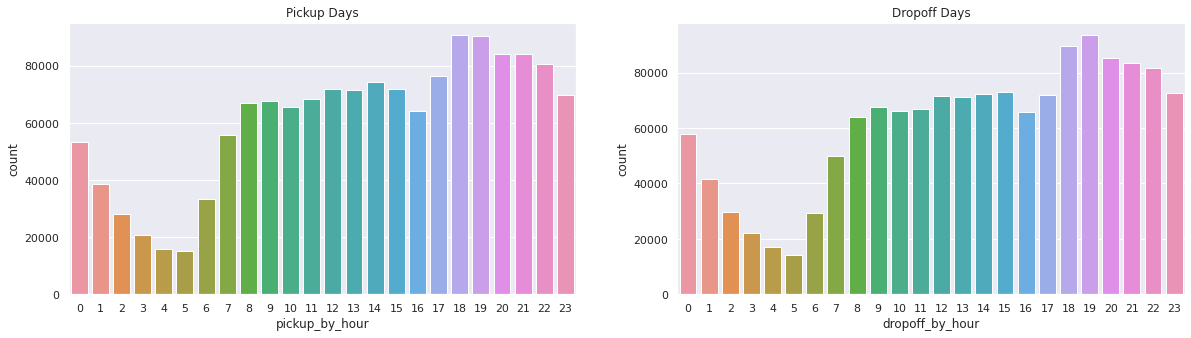

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_by_hour",data=df,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_by_hour",data=df,ax=ax10)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.


this hours are called peak hour in new york city

Trips per Time of Day


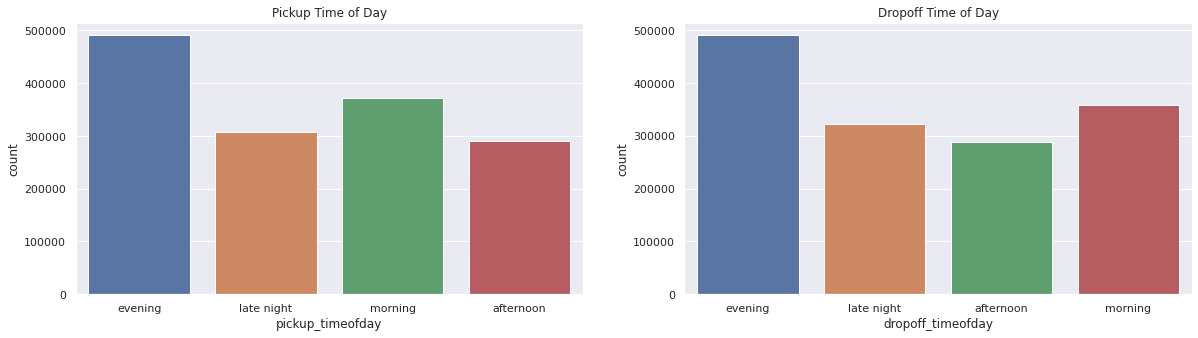

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,pickup_day,dropoff_day,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,3,3,0,0,17,17,Monday,Monday,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,6,6,6,6,0,0,Sunday,Sunday,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,1,1,1,1,11,12,Tuesday,Tuesday,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,4,4,2,2,19,19,Wednesday,Wednesday,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,3,3,5,5,13,13,Saturday,Saturday,1.188590




---



In [ ]:
df_copy.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'dropoff_month', 'pickup_by_weekday',
       'dropoff_by_weekday', 'pickup_by_hour', 'dropoff_by_hour', 'pickup_day',
       'dropoff_day', 'pickup_timeofday', 'dropoff_timeofday',
       'trip_distance'],
      dtype='object')

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1404787.0,1.533747,0.498860,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,1404787.0,1.662650,1.313397,1.000000,1.000000,1.000000,2.000000,6.000000
pickup_longitude,1404787.0,-73.975942,0.066369,-121.933342,-73.991997,-73.981964,-73.968201,-66.972160
pickup_latitude,1404787.0,40.751968,0.029393,34.712234,40.738045,40.754375,40.768360,51.881084
dropoff_longitude,1404787.0,-73.974583,0.066778,-121.933304,-73.991371,-73.979897,-73.963600,-69.048019
dropoff_latitude,1404787.0,40.752580,0.032633,32.181141,40.736725,40.754772,40.770031,43.674000
trip_duration,1404787.0,768.764549,495.920729,40.000000,393.000000,647.000000,1027.000000,2500.000000
pickup_month,1404787.0,3.505281,1.679896,1.000000,2.000000,4.000000,5.000000,6.000000
dropoff_month,1404787.0,3.505577,1.680045,1.000000,2.000000,4.000000,5.000000,7.000000
pickup_by_weekday,1404787.0,3.056829,1.957425,0.000000,1.000000,3.000000,5.000000,6.000000


note 1 we have check trip distace 1240 is not possibe in NY

In [ ]:
df_copy.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'dropoff_month', 'pickup_by_weekday',
       'dropoff_by_weekday', 'pickup_by_hour', 'dropoff_by_hour', 'pickup_day',
       'dropoff_day', 'trip_distance'],
      dtype='object')

In [ ]:
df_copy['pickup hour']=df_copy['pickup_datetime'].dt.hour

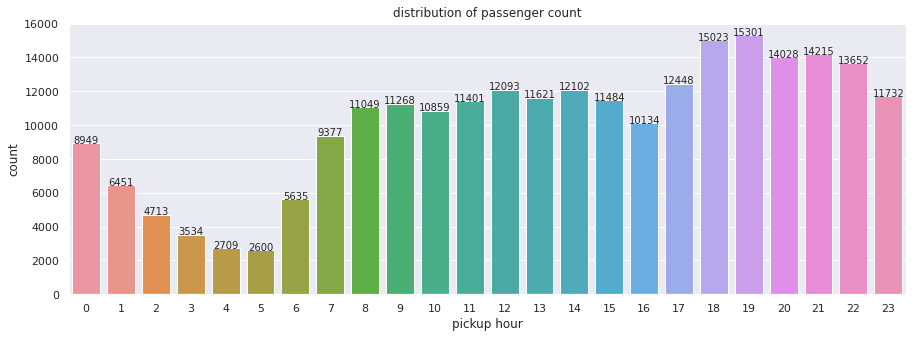

In [ ]:
figure,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x=df_copy['pickup hour'])
plt.title('distribution of passenger count')

for p in ax.patches:
  height=p.get_height()
  ax.text(x=p.get_x() + (p.get_width()/2),
  y=height + .2, ha='center', s='{:.0f}'.format(height))

plt.show()


this graph shows that the peak hours of rides are 17 i.e 5pm and 18 i.e 6pm 
and 

2am to 5am is time when lowest rides occur.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


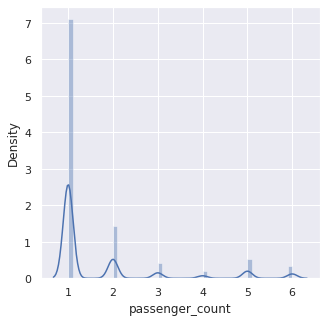

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df_copy['passenger_count'])

Text(0.5, 0, 'passenger_count')

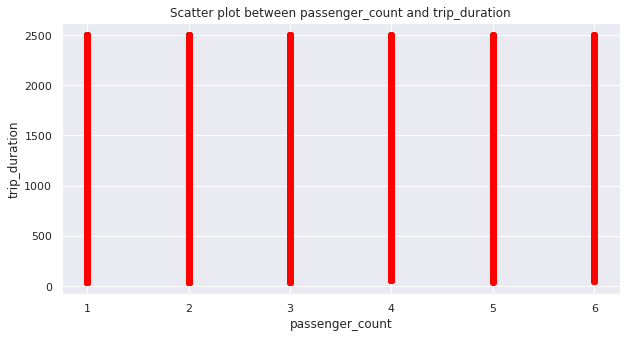

In [ ]:
plt.figure(figsize=(10,5))
y = df_copy['trip_duration']
x = df_copy['passenger_count']
plt.scatter(x, y,color='red')
plt.title('Scatter plot between passenger_count and trip_duration')
plt.ylabel('trip_duration')
plt.xlabel('passenger_count')

In [ ]:
df_copy['passenger_count'].value_counts()

1    171910
2     34793
5     13032
3     10030
6      7965
4      4648
Name: passenger_count, dtype: int64

In [ ]:
df[df['trip_duration'] > 1500000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,pickup_day,dropoff_day,trip_distance,pickup_timeofday,dropoff_timeofday,pickup hour


In [ ]:
df_copy.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,pickup_day,dropoff_day,trip_distance,pickup hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,0,0,17,17,Monday,Monday,1.498523,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,6,0,0,Sunday,Sunday,1.805510,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,1,11,12,Tuesday,Tuesday,6.385107,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,2,2,19,19,Wednesday,Wednesday,1.485500,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,5,5,13,13,Saturday,Saturday,1.188590,13


## Scatter plot

In [ ]:
df_copy.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'dropoff_month', 'pickup_by_weekday',
       'dropoff_by_weekday', 'pickup_by_hour', 'dropoff_by_hour', 'pickup_day',
       'dropoff_day', 'trip_distance', 'pickup hour'],
      dtype='object')

In [ ]:
dependent_variable='trip_duration'

In [ ]:

independent_variables = list(set(df_copy.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

In [ ]:
# Dependent variable 'tripduriation'
plt.figure(figsize=(7,7))
sns.distplot(df_copy['trip_duration'],color="y")

In [ ]:
for col in independent_variables[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_copy[col]
    label = df_copy['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_copy[col], df_copy['trip_duration'], 1)
    y_hat = np.poly1d(z)(df_copy[col])

    plt.plot(df_copy[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
numeric_features = df_copy.describe().columns
numeric_features

NameError: ignored

ValueError: ignored

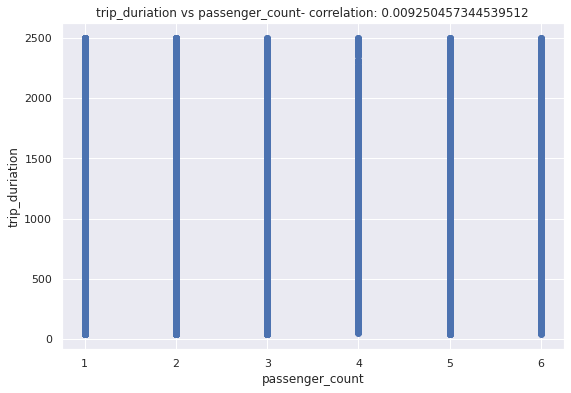

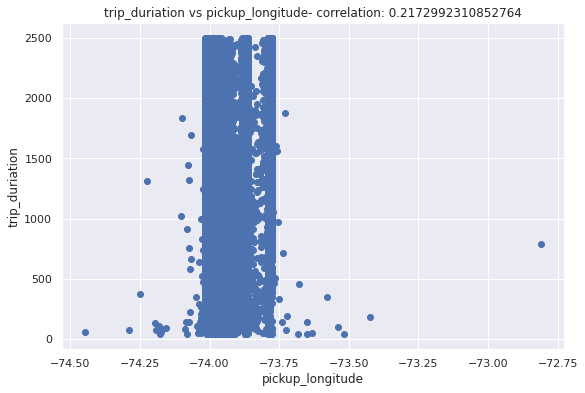

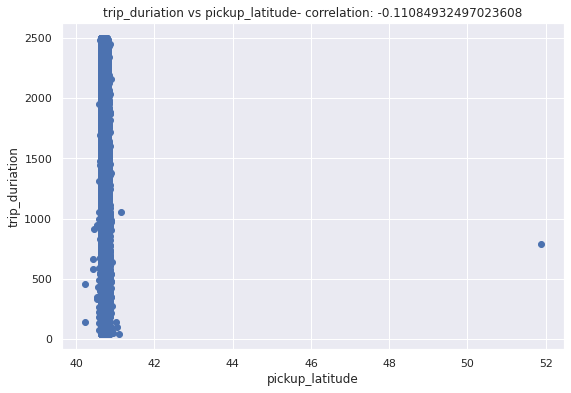

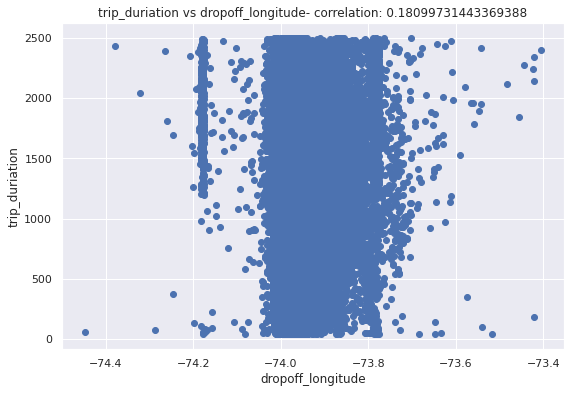

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature =df_copy[col]
    label = df_copy['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duriation')
    ax.set_title('trip_duriation vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_copy[col], df_copy['trip_duration'], 1)
    y_hat = np.poly1d(z)(df_copy[col])

    plt.plot(df_copy[col], y_hat, "r--", lw=1)

plt.show()